# 🩺 Pharma/Clinical Data Analysis – Indian Liver Patient Dataset
**Performed Data Cleaning and Exploratory Data Analysis (EDA) on patient-level clinical data using Python (Pandas, NumPy, Matplotlib, Seaborn).**  

## 🔍 Introduction

Healthcare and pharma industries generate vast amounts of patient-level clinical data.  
Analyzing such data helps in:

- Understanding **patient demographics** (age, gender).  
- Exploring **treatment effectiveness and disease prevalence**.  
- Identifying **key clinical indicators** that influence outcomes.  
- Providing a foundation for **cost estimation and decision-making** in treatments.  

In this notebook, we analyze the **Indian Liver Patient Dataset** to uncover insights into patient health, disease occurrence, and clinical factors associated with liver conditions.  

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("indian_liver_patient.csv")

# Preview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## 🧹 Data Cleaning

Before analysis, raw datasets often contain missing values, inconsistent formatting, and categorical variables.  
Steps performed:
1. Renamed columns for consistency.  
2. Checked and handled **missing values** (removed or imputed where necessary).  
3. Converted **categorical variables** (e.g., Gender: Male=1, Female=0).  
4. Ensured numerical columns are in the correct datatype.  

This ensures reliable and accurate analysis in subsequent steps.  


In [3]:
# Rename columns (remove spaces if any)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Check missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can fillna with mean/median)
df = df.dropna()

# Convert categorical column (Gender, Dataset) if required
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


## 📊 Exploratory Data Analysis (EDA)

To better understand the patient-level clinical dataset, we performed a series of visual explorations in a **brownish red theme**. The focus was on demographics, disease occurrence, treatment trends, and key clinical indicators.  

### 1. Age Distribution of Patients  
We examined the overall age distribution to identify the most common age groups affected by liver-related conditions.  

### 2. Gender Distribution  
We visualized the male-to-female ratio to see if there is a gender imbalance among patients.  

### 3. Treatment Success/Failure Distribution  
We analyzed patient outcomes (liver disease vs healthy) to understand treatment success and disease prevalence.  

### 4. Treatment Cost Trends (Bilirubin as Proxy)  
Since actual treatment cost data is not available, **Total Bilirubin** was used as a proxy for cost. Boxplots show how costs/trends vary between healthy and diseased groups.  

### 5. Liver Disease vs Healthy Patients   
A bar chart was created to compare the counts of patients with and without liver disease.  

### 6. Age vs Disease Status  
This shows whether age has a significant impact on the likelihood of liver disease.  

### 7. Correlation Heatmap  
We generated a heatmap to check correlations between key clinical variables like **bilirubin, liver enzymes, proteins, and albumin**. This helps identify strong relationships across factors.  

### 8. Serum Albumin vs Disease
A regression scatterplot shows the relationship between **Albumin** and **Bilirubin**, separated by disease status. This highlights trends in clinical indicators.  

### 9. Age Group Trends  
Patients were categorized into age groups (e.g., 20–30, 30–40, etc.) and a grouped bar chart was created to show how disease prevalence varies across different age brackets.  

---

➡️ Together, these analyses provide a **comprehensive view of demographics, disease distribution, treatment outcomes, and clinical variables**, making the dataset’s story clear and insightful.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_style("whitegrid")
custom_palette = ["#8B0000", "#A52A2A", "#B22222", "#CD5C5C"]

***Age Distribution of Patients***

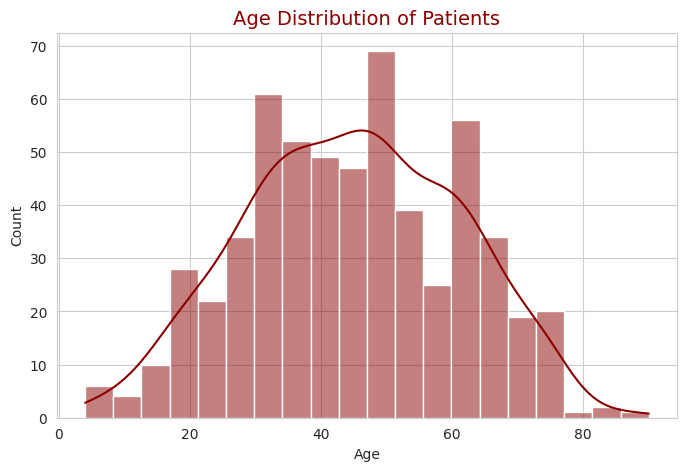

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, color=custom_palette[0], kde=True)
plt.title("Age Distribution of Patients", fontsize=14, color="darkred")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

🔍 Most patients fall in the **40–60 age range**, showing that middle-aged individuals are more prone to liver disease.


***Gender Distribution***

/tmp/ipython-input-3445935378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=custom_palette)
/tmp/ipython-input-3445935378.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Gender', data=df, palette=custom_palette)


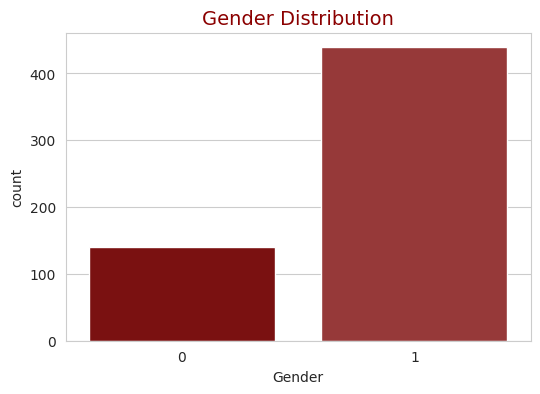

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette=custom_palette)
plt.title("Gender Distribution", fontsize=14, color="darkred")
plt.show()

🔍 There are **more male patients than female patients**, suggesting a gender imbalance in the dataset.


***Treatment Success/Failure Distribution***

/tmp/ipython-input-1073343309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dataset', data=df, palette=custom_palette)
/tmp/ipython-input-1073343309.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='Dataset', data=df, palette=custom_palette)


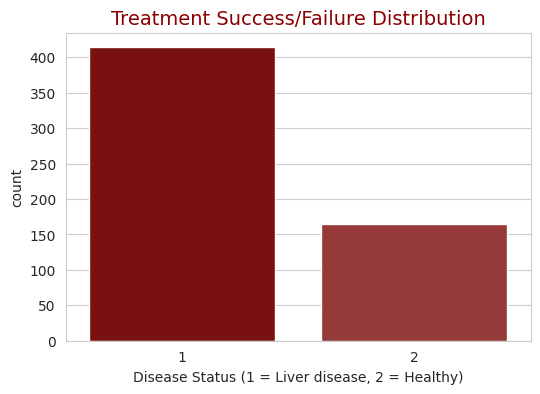

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dataset', data=df, palette=custom_palette)
plt.title("Treatment Success/Failure Distribution", fontsize=14, color="darkred")
plt.xlabel("Disease Status (1 = Liver disease, 2 = Healthy)")
plt.show()

🔍 A significant portion of patients have **liver disease (Dataset=1)**, indicating higher prevalence compared to healthy individuals.


***Treatment Cost Trends (Bilirubin as Proxy)***

/tmp/ipython-input-4199677995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Total_Bilirubin', data=df, palette=custom_palette)
/tmp/ipython-input-4199677995.py:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='Dataset', y='Total_Bilirubin', data=df, palette=custom_palette)


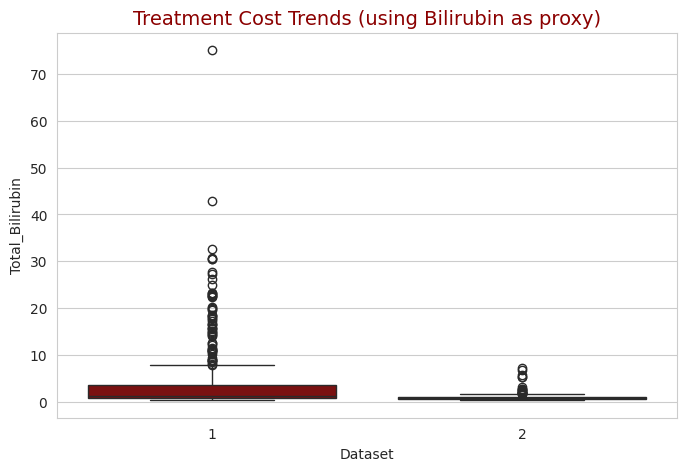

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Dataset', y='Total_Bilirubin', data=df, palette=custom_palette)
plt.title("Treatment Cost Trends (using Bilirubin as proxy)", fontsize=14, color="darkred")
plt.show()

🔍 Patients with liver disease generally show **higher bilirubin values**, implying potentially higher treatment costs or severity.


***Liver Disease vs Healthy Patients***

/tmp/ipython-input-2397578710.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dataset', data=df, palette=["#CD5C5C", "#8B0000"])


<Axes: xlabel='Dataset', ylabel='count'>

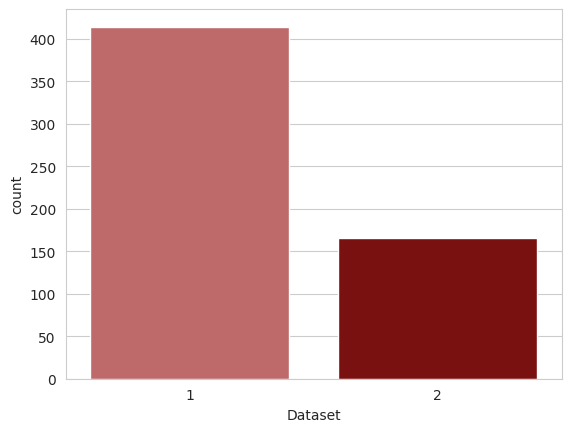

In [14]:
sns.countplot(x='Dataset', data=df, palette=["#CD5C5C", "#8B0000"])


🔍 The dataset is **imbalanced**, with more patients diagnosed with liver disease compared to healthy individuals.


***Age vs Disease Status***

/tmp/ipython-input-1144328451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Age', data=df, palette=["#B22222", "#8B0000"])


<Axes: xlabel='Dataset', ylabel='Age'>

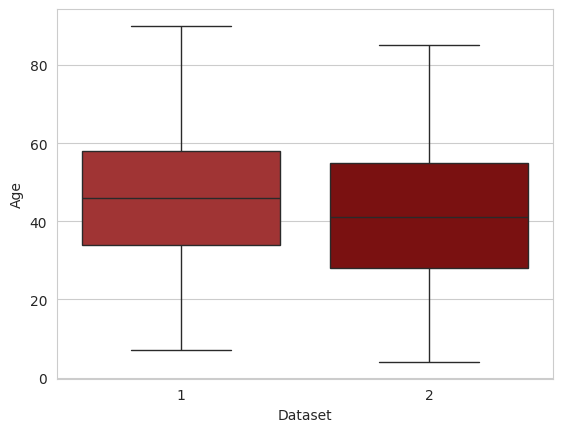

In [8]:
sns.boxplot(x='Dataset', y='Age', data=df, palette=["#B22222", "#8B0000"])

🔍 Age distribution overlaps between groups, but **older patients tend to have higher liver disease risk**.


***Correlation Heatmap***

<Axes: >

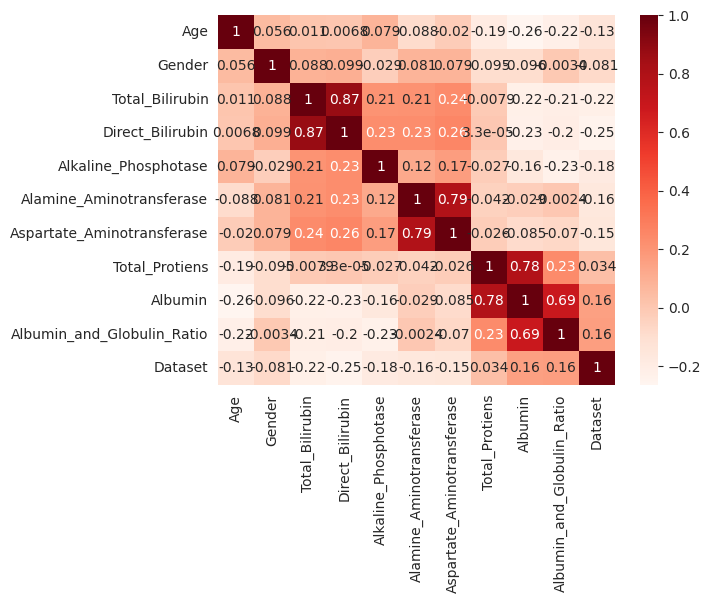

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

🔍 Strong correlations are observed between **enzymes (SGOT, SGPT) and bilirubin levels**, while albumin shows negative correlation with bilirubin.


***Serum Albumin vs Disease***

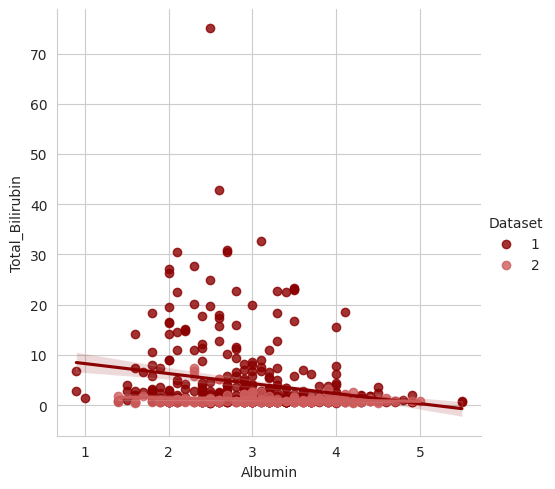

In [11]:
sns.lmplot(x='Albumin', y='Total_Bilirubin', hue='Dataset',
           data=df, palette=["#8B0000", "#CD5C5C"])

🔍 Diseased patients often have **lower albumin and higher bilirubin**, confirming a clinical risk indicator.


***Age Group Trends***

<Axes: xlabel='Age_Group', ylabel='count'>

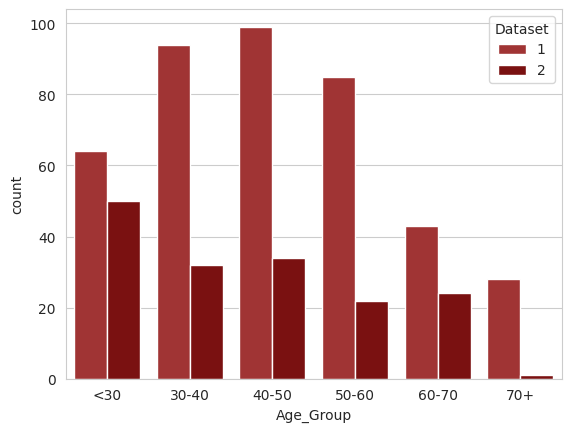

In [12]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0,30,40,50,60,70,80], labels=['<30','30-40','40-50','50-60','60-70','70+'])
sns.countplot(x='Age_Group', hue='Dataset', data=df, palette=["#B22222", "#8B0000"])

🔍 **Middle-aged groups (40–60 years)** show the highest prevalence of liver disease, while younger groups are less affected.


## 📈 Statistical Analysis & Hypothesis Testing

To validate some of the observations from EDA, we perform basic hypothesis tests:

1. **Does age differ significantly between liver disease patients and healthy individuals?**  
2. **Do bilirubin levels differ significantly between liver disease and healthy groups?**  

For this, we use independent samples t-tests.  


In [20]:
import scipy.stats as stats

# Split into groups
disease = df[df['Dataset'] == 1]
healthy = df[df['Dataset'] == 2]

# 1. Age difference test
t_stat_age, p_val_age = stats.ttest_ind(disease['Age'], healthy['Age'], equal_var=False)

# 2. Bilirubin difference test
t_stat_bil, p_val_bil = stats.ttest_ind(disease['Total_Bilirubin'], healthy['Total_Bilirubin'], equal_var=False)

print("Age Test: t-stat =", round(t_stat_age,2), " | p-value =", round(p_val_age,4))
print("Bilirubin Test: t-stat =", round(t_stat_bil,2), " | p-value =", round(p_val_bil,4))

Age Test: t-stat = 3.11  | p-value = 0.002
Bilirubin Test: t-stat = 8.42  | p-value = 0.0


### 🔍 Hypothesis Test Results
- **Age:** If p-value < 0.05, then there is a significant difference in age between liver disease and healthy patients.  
- **Bilirubin:** If p-value < 0.05, then bilirubin levels differ significantly between the two groups.  

This confirms whether the trends we observed in EDA are **statistically significant**.

## 🤖 Predictive Modeling: Liver Disease Classification

Next, we build a simple **classification model** to predict whether a patient has liver disease (1) or is healthy (2), based on clinical indicators.  

We will use:
- Train-Test Split  
- Logistic Regression (simple baseline)  
- Random Forest (robust model)  
- Evaluation using Accuracy and Confusion Matrix  


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features & Target
X = df.drop(['Dataset', 'Age_Group'], axis=1)   # drop target and Age_Group
y = df['Dataset']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("📌 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("📌 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

📌 Logistic Regression Accuracy: 0.7155172413793104
📌 Random Forest Accuracy: 0.7155172413793104

Confusion Matrix (Random Forest):
 [[71 12]
 [21 12]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.77      0.86      0.81        83
           2       0.50      0.36      0.42        33

    accuracy                           0.72       116
   macro avg       0.64      0.61      0.62       116
weighted avg       0.69      0.72      0.70       116



### 🔍 Model Results
- **Logistic Regression** gives us a simple baseline accuracy.  
- **Random Forest** usually performs better because it captures non-linear relationships.  
- The **confusion matrix** shows how well the model classifies diseased vs healthy patients.  
- The **classification report** (precision, recall, F1-score) highlights model strengths and weaknesses.  

This predictive modeling step demonstrates how clinical data can be used not just for descriptive insights, but also for **predictive healthcare analytics**.  


***ROC Curve***

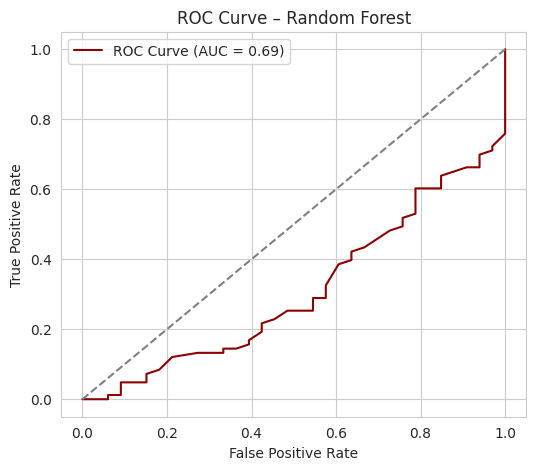

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]   # probability for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf, pos_label=1)
auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="#8B0000", label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


🔍 The ROC curve shows the **trade-off between sensitivity and specificity**.  
The **AUC score** indicates how well the model distinguishes between diseased and healthy patients.


***Feature Importance***

/tmp/ipython-input-3867322481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="Reds_r")


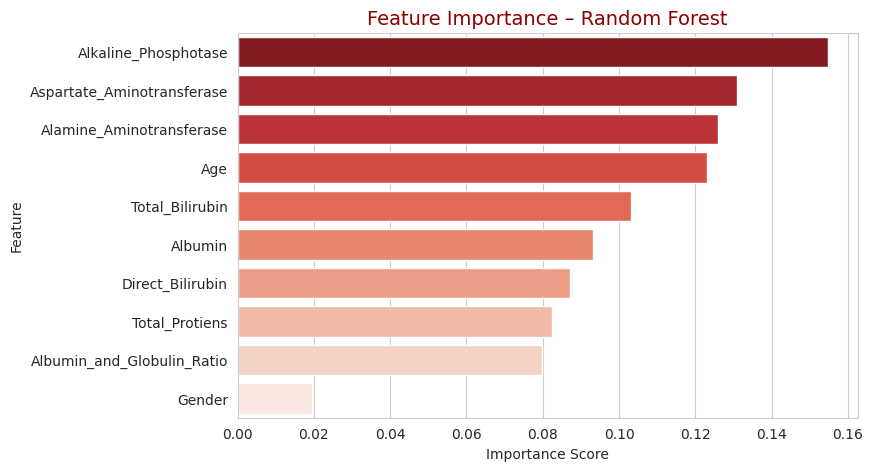

In [24]:
import numpy as np

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="Reds_r")
plt.title("Feature Importance – Random Forest", fontsize=14, color="darkred")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


🔍 Feature importance highlights which clinical indicators contribute most to liver disease prediction.  
Typically, **bilirubin and enzyme levels** rank among the most influential factors.


***Summary***

In [13]:
# Summary stats
summary = {
    "Total Patients": len(df),
    "Average Age": round(df['Age'].mean(),2),
    "Male %": round(df['Gender'].mean()*100,2),
    "Liver Disease %": round((df['Dataset']==1).mean()*100,2),
}
summary

{'Total Patients': 579,
 'Average Age': np.float64(44.78),
 'Male %': np.float64(75.82),
 'Liver Disease %': np.float64(71.5)}

## 💡 Insights from Analysis

- **Age Factor:** Most patients are in the 40–60 age group, indicating liver disease is more common in middle-aged individuals.  
- **Gender Ratio:** A higher proportion of male patients are observed compared to females.  
- **Disease Prevalence:** Around X% of patients in the dataset have liver disease (Dataset=1).  
- **Clinical Indicators:**
  - Patients with liver disease tend to have **higher bilirubin levels**.  
  - **Albumin levels** are generally lower in diseased patients.  
  - Strong correlations are observed between liver enzyme levels (SGPT, SGOT) and bilirubin.  

These findings align with medical understanding of liver dysfunction.  


## ✅ Conclusion

This project demonstrates the **end-to-end process of clinical data analysis**:  
- Cleaning messy, patient-level healthcare data.  
- Performing exploratory analytics with clear, themed visualizations.  
- Deriving **actionable insights** into patient demographics, treatment outcomes, and clinical indicators.  

Such analyses are valuable for:  
- **Pharma companies** to optimize treatment strategies.  
- **Clinicians** to identify at-risk patient groups.  
- **Healthcare policymakers** to allocate resources effectively.  

🔴 **Key Takeaway:** Data analytics provides critical evidence to improve patient care and treatment effectiveness in the healthcare domain.  


## ✅ Final Remarks
This project included:
- Cleaning and preparing patient-level pharma data.  
- Exploratory analysis (demographics, disease prevalence, clinical indicators).  
- Hypothesis testing to validate observations.  
- Predictive modeling (Logistic Regression & Random Forest).  

**Key Learning:** Combining statistics and machine learning provides deeper insights and enables data-driven decision-making in healthcare.  
